# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
Rain is an advantage in the right conditions and can also be a disadvantage in other conditions. Therefore, there are so many institutions that try to predict rain. In Indonesia, BMKG itself is a lemabaga that has tasks, one of which is weather prediction.

# The Objective
On this observation, I made a model with the available data to be able to make a prediction of tomorrow's weather: is it raining? Or is it not raining? And this model can also be used for everyone.

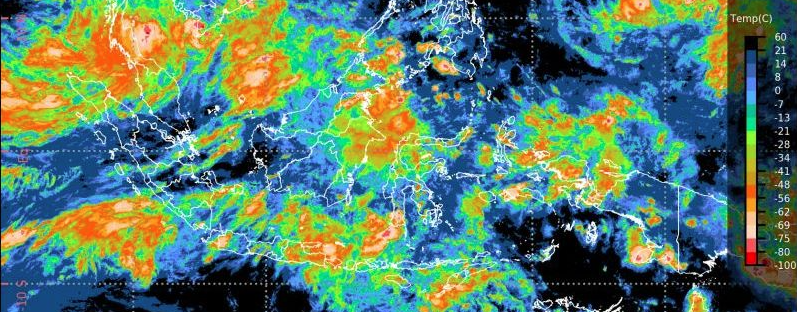

In [52]:
Image(filename='rain.png') 

# A. Library

In [2]:
# Data Exploring
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import plotly.express as px

# Data Processing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# Data Modelling
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
# Data Evaluation
from sklearn.metrics import classification_report, roc_auc_score

# B. Data Loading

In [3]:
data = pd.read_csv('Rain_tomorrow_prediction.csv')
pd.set_option('display.max_columns', None)

In [4]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [5]:
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN

### 1. Data information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

From this basic information, it can be known that the dataframe is formed from:
- Number of rows of data 145460
- Number of columns 23
- 16 columns of type **float**
- 7 columns of type **object**

In [7]:
data.describe().T

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

found several anomalies; the maximum value is different in these columns:
- Rainfall
- Evaporation
- WindSpeed9am

In [8]:
# Defining the value of each column
print("All columns Unique values count")
for col in data:
    print(col, len(data[col].unique()), sep=': ')

All columns Unique values count
Date: 3436
Location: 49
MinTemp: 390
MaxTemp: 506
Rainfall: 682
Evaporation: 359
Sunshine: 146
WindGustDir: 17
WindGustSpeed: 68
WindDir9am: 17
WindDir3pm: 17
WindSpeed9am: 44
WindSpeed3pm: 45
Humidity9am: 102
Humidity3pm: 102
Pressure9am: 547
Pressure3pm: 550
Cloud9am: 11
Cloud3pm: 11
Temp9am: 442
Temp3pm: 503
RainToday: 3
RainTomorrow: 3


**why on the target there are 3 values?**

In [9]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

it turns out that there is a missing value on the target
- Handling Drop is the best way because the missing value is on target.

### 2. Data Cleaning

In [11]:
# menjumlahkan missing valaue setiap kolom
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<AxesSubplot:>

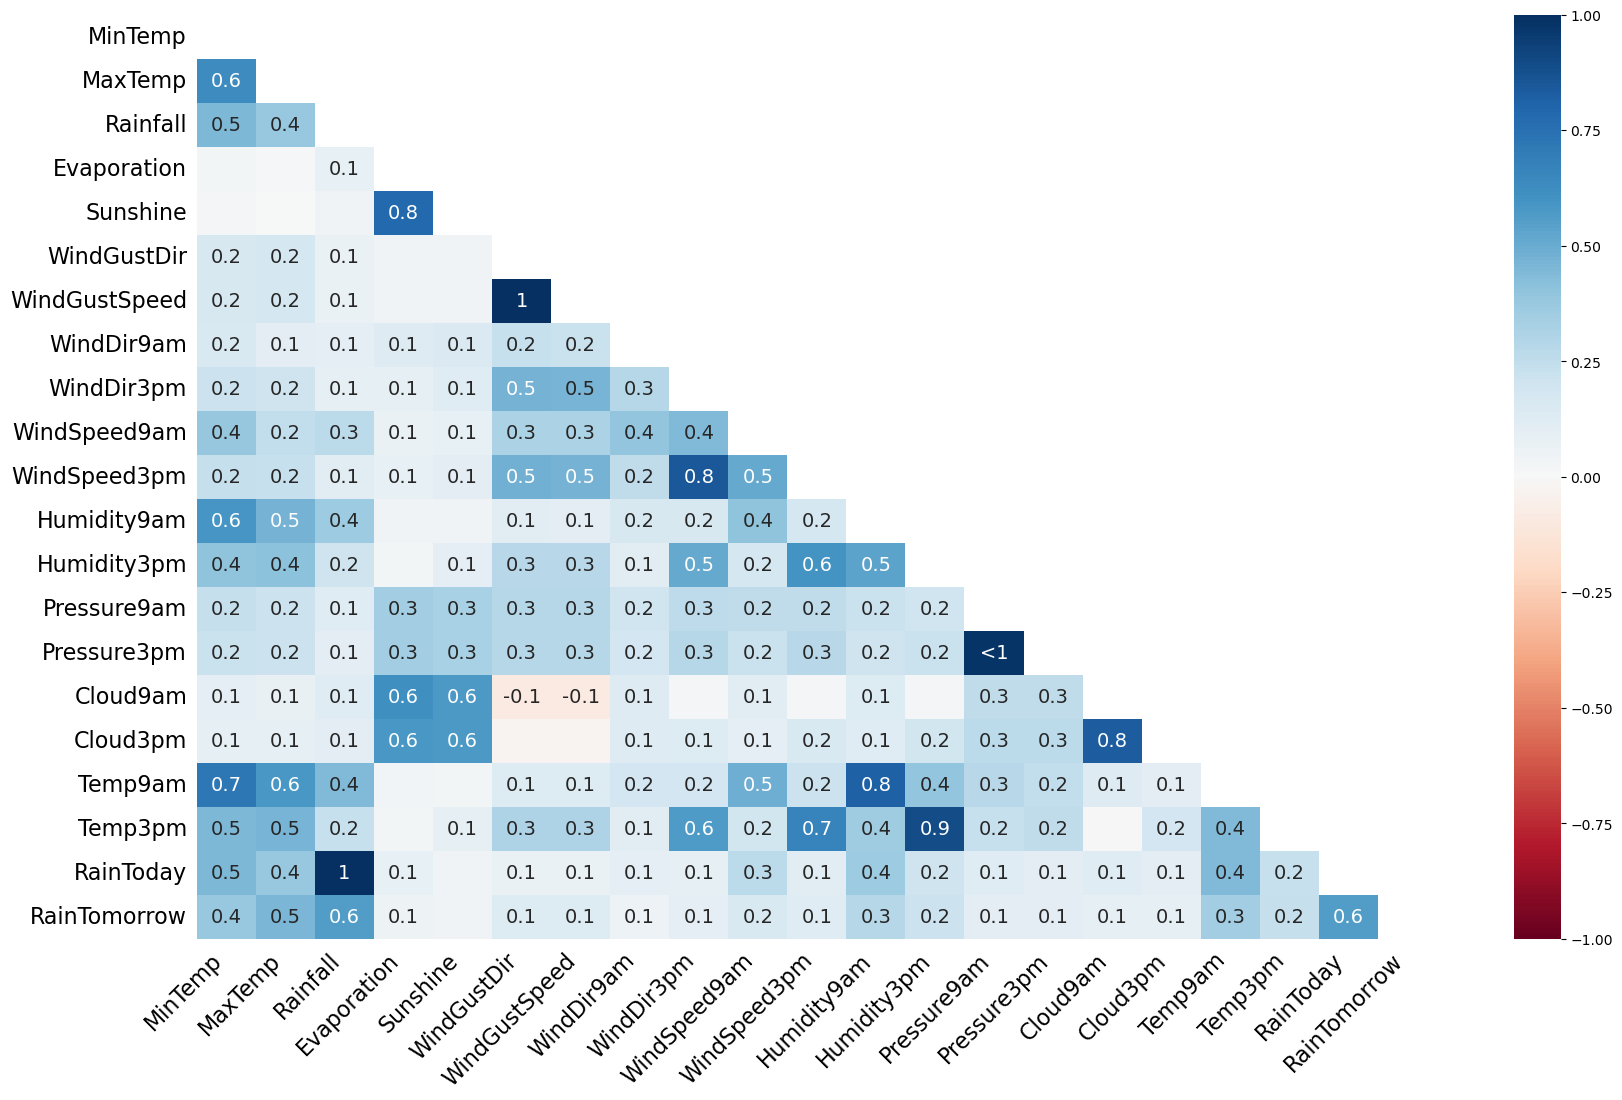

In [12]:
# melihat korelasi data missing
import missingno as msno
msno.heatmap(data)

The number of missing values is very large; some columns are even very large.
- In the Sunshine column, missing value equals 69835; if presented, this represents nearly 70% of the data.
- not less numerous in other columns
- and almost all columns here have missing values.

According to the author of this data is very dirty, **If done imputer the author is worried that all distributions and values of the median, std, etc. will center on the imputer value and change the value and calculation of the actual data.**
- on the msno heatmap** it is found that this column2 has a correlation so it is not efective if the column is dropped
- With this in mind the author drops the missing data.

In [13]:
# drop missing value
data = data.dropna(axis=0)

### 3. Data duplicated

In [14]:
# checking duplicated data
data.duplicated().sum()

0

- No duplicated data was found.

# C.Exploratory Data Analysis

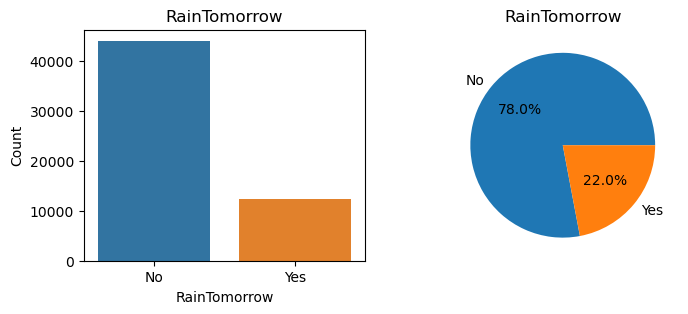

In [15]:
# Display the percentage of rainy tomorrow.
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.countplot(x='RainTomorrow', data=data)
plt.title('RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data.RainTomorrow.value_counts(), labels=data.RainTomorrow.value_counts().index, autopct='%1.1f%%')
plt.title('RainTomorrow')
plt.show()

It is known that the weather is more often not raining than raining, and this is in accordance with the actual rules because indeed rain does not fall more often than rain; the percentage of rain is 22%.

In [16]:
# a comparison of RainToday and RainTomorrow 
px.histogram(data, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs Rain Today')

It looks like we're going to make this a feature.
- There's a relationship between rain today and rain tomorrow.
- For example, in the rainy season, the probability of rain tomorrow is greater.

In [17]:
# showing the pressure distribution at 3 p.m. versus 9 a.m. 
px.scatter(data.sample(1000), 
           title='Pressure3pm vs Pressure9am',
           x='Pressure3pm',
           y='Pressure9am',
           color='RainTomorrow')

preassure refers to air pressure.has a positive correlation between the two, but if you look further at rain tomorrow, the scatter distribution shows the smaller the probability, the more the probability of rain increases, and the greater the probability of rain decreases.

# D. Data Preprocessing

### D1. Heatmap Corelation

interval columns not set, guessing: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


<AxesSubplot:>

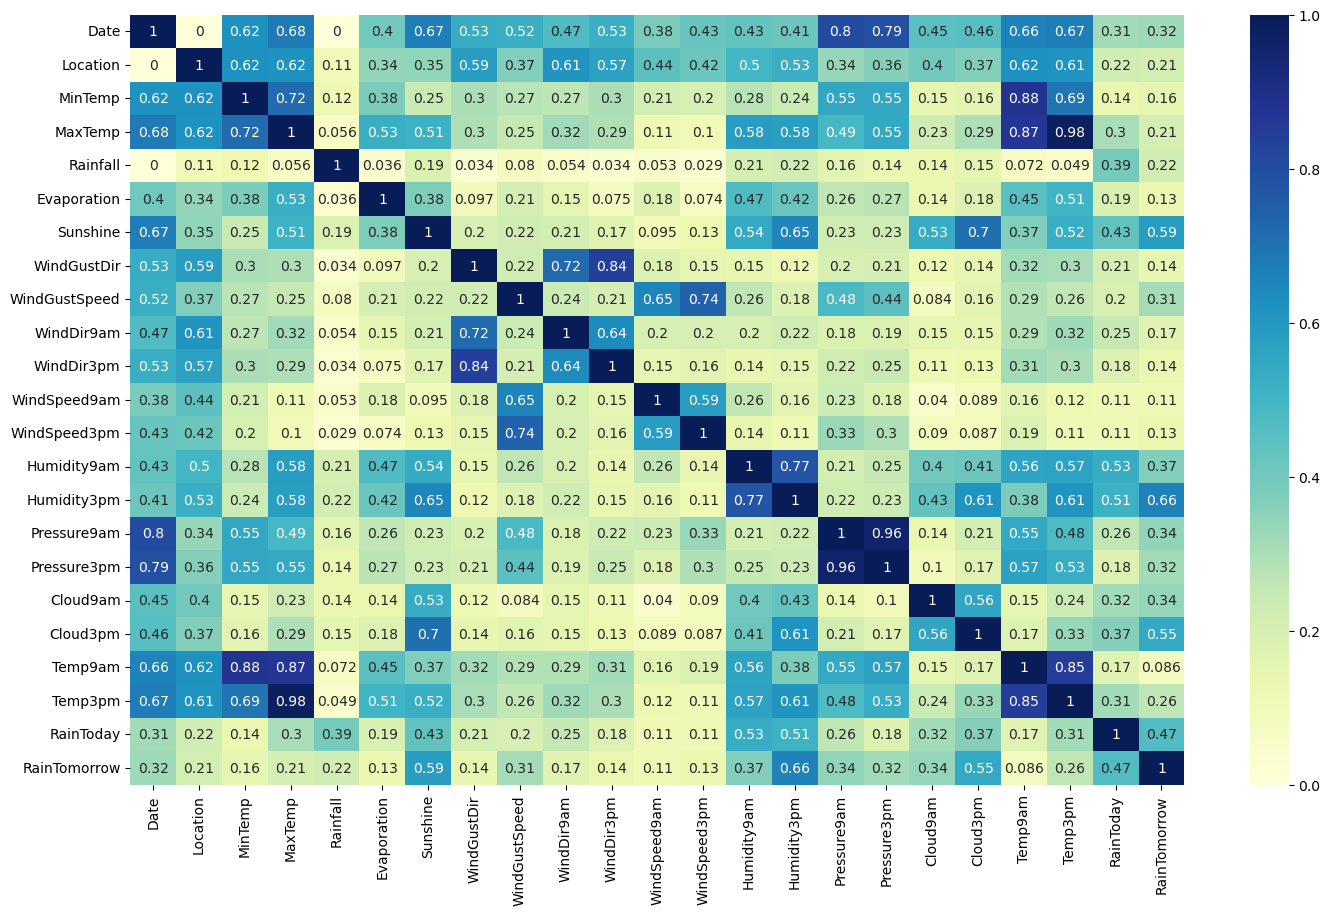

In [18]:
plt.figure(figsize=(17,10))
sns.heatmap(data.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

selection columns for feature,
Columns with a connection to Tomorrow will be kept and featured; these columns are:
- "Date," "Sunshine," "WindGustSpeed," "Humidity 9am," "Humidity 3pm," "Pressure 9am," "Pressure 3pm," "Cloud 9am," "Cloud 3pm," "Rain Today," and "Rain Tomorrow."
It turns out that "date" also has a large correlation with the target
- After further investigation, it was discovered that this date depicts the seasons of a given month, and **Australia has four seasons** (December-February = summer, March-May = autumn, June-August = winter, and September-November = spring).
Therefore, we will change the date based on the season.

In [19]:
# Make a function that changes the datetime to the season. 

def season_replace(df):
    import datetime as dt
#     Make a month function. 
    month = []
    for num in df['Date']:
#      DateTime Selection
        date_obj = dt.datetime.strptime(num,"%Y-%m-%d")
#     take only the month
        date_mon = date_obj.month
#     Add a month
        month.append(date_mon)
#     enter the season value according to the month
    season_options = ['Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring','Summer']
#     Create the Season function
    seasons= []
    for i in month:
#      Enter the season value
        seasons.append(season_options[i-1])
#     date column drop
    n = df.columns[0]
    df.drop(n, axis = 1, inplace = True)
#     Add a new Season column to a DataFrame
    df['Seasons'] = seasons
#     Insert a new column into a DataFrame
    df = df[['Seasons'] +  [col for col in df.columns if col != 'Seasons']]
    return df

In [20]:
# menerapkan perubahan pada dataframe
data = season_replace(data)

### D2. Feature Selection

In [21]:
# selection of features based on the correlation
data_new = data[['Seasons', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']]

### D3. Split Data

In [24]:
# Split Train and Test Data
train, test = train_test_split(data_new, test_size=0.3, random_state=41)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (39494, 11)
Test size:  (16926, 11)


In [26]:
train.head()

Seasons  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
76604   Spring       8.6           63.0         72.0         77.0   
37765   Winter       4.3           22.0         91.0         54.0   
121246  Autumn      11.6           33.0         35.0         16.0   
34314   Autumn       2.9           41.0         42.0         43.0   
136936  Autumn      10.3           46.0         54.0         27.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm RainToday RainTomorrow  
76604        1008.0       1007.4       6.0       8.0       Yes          Yes  
37765        1023.6       1019.3       1.0       7.0        No           No  
121246       1014.6       1011.2       0.0       0.0        No           No  
34314        1027.4       1026.8       2.0       7.0        No           No  
136936       1026.8       1023.2       1.0       0.0        No           No

### D4. Checking outlier dan skewness

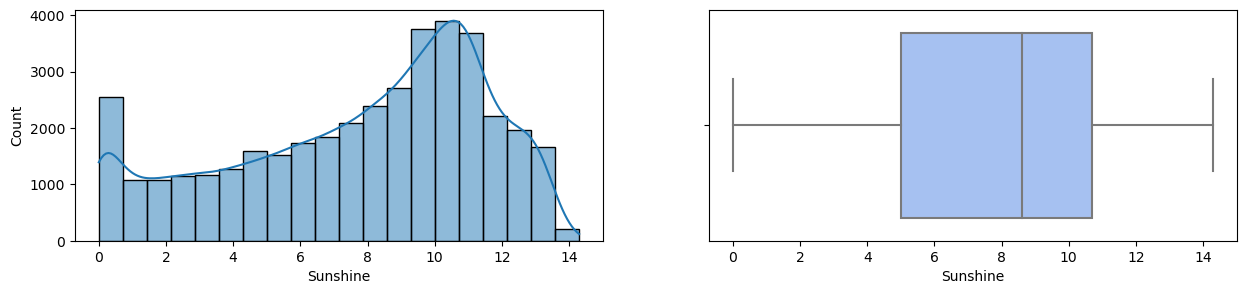

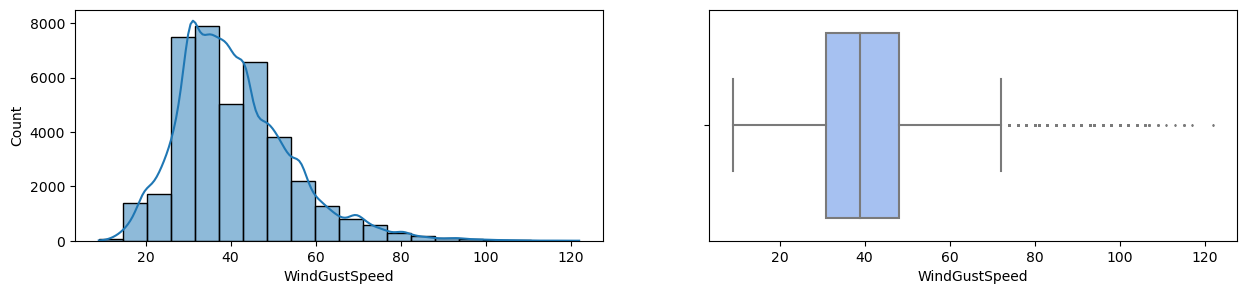

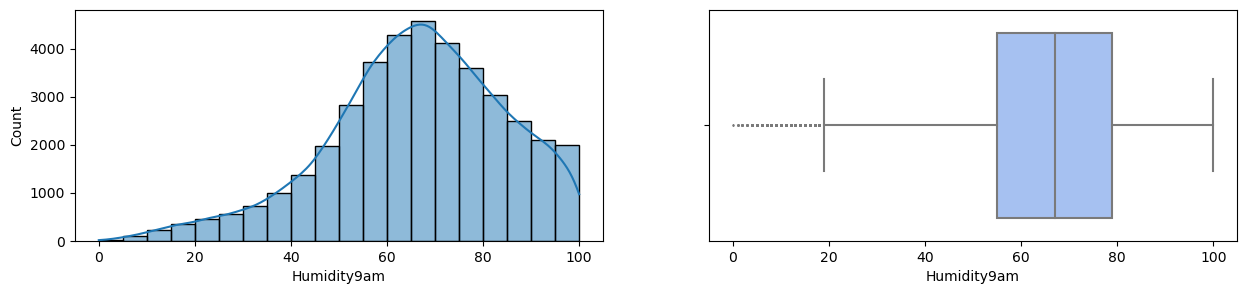

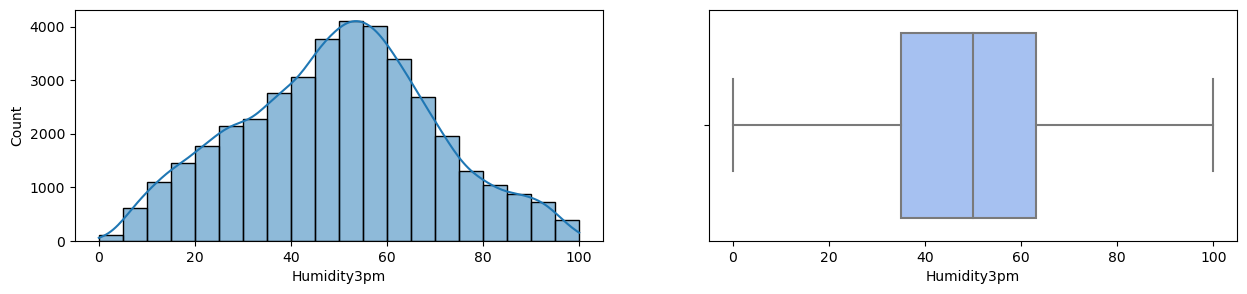

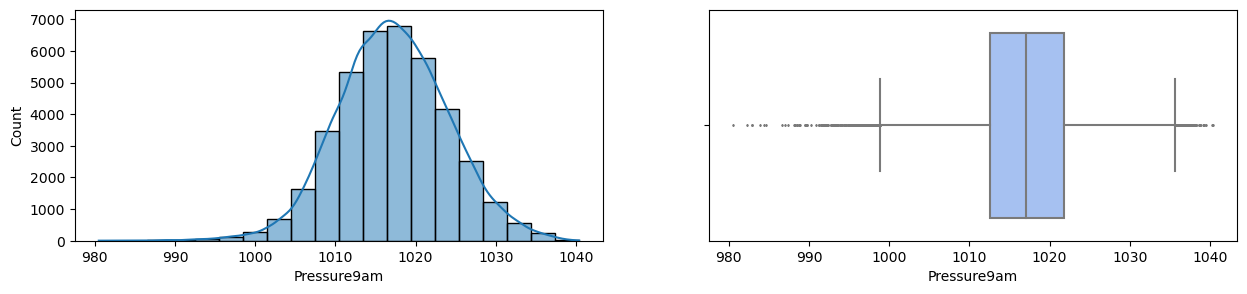

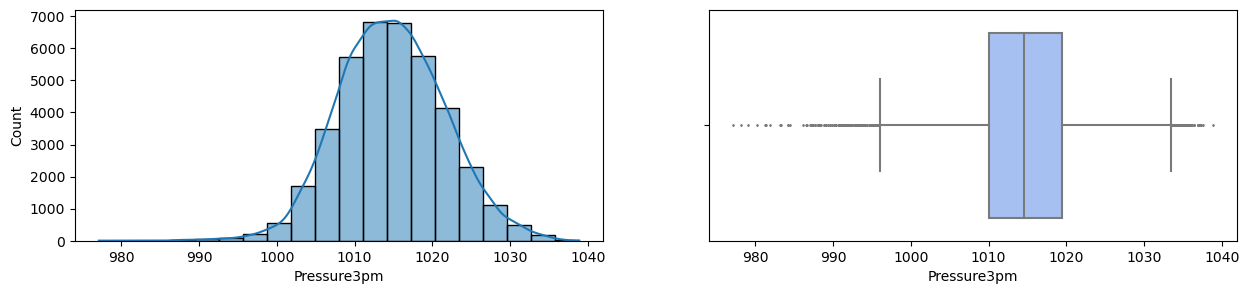

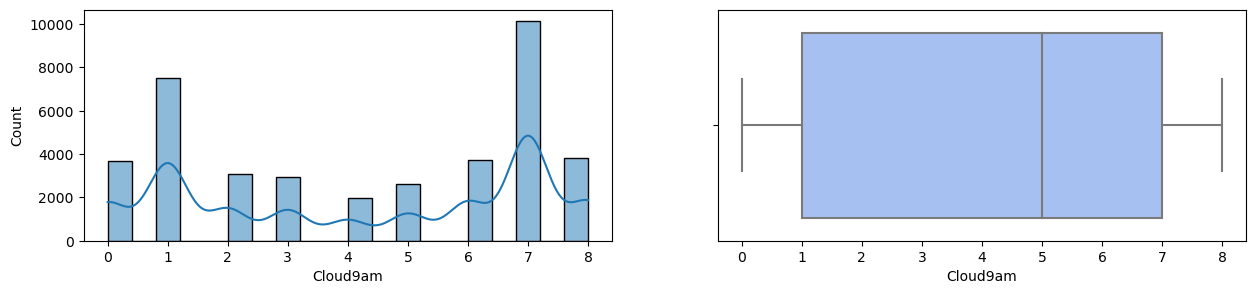

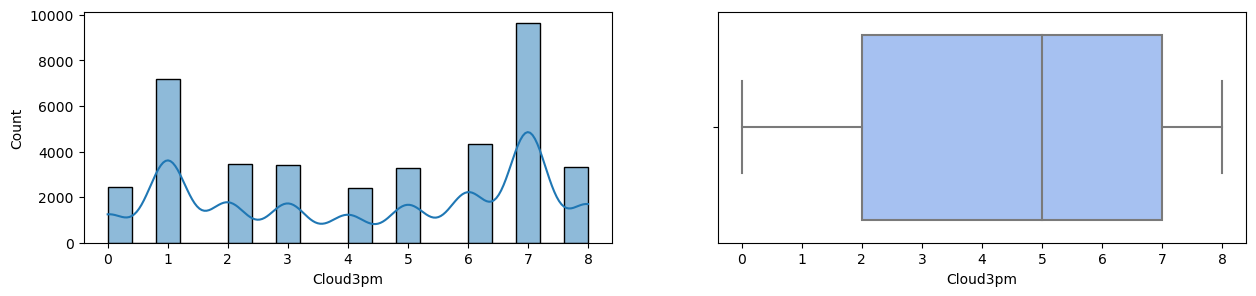

In [27]:
# Create functions to display the histogram and box plot.
num_col = ['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(train[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(train[i], ax = axs[1], color='#99befd', fliersize=1);

In [28]:
features_with_outliers = ['WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Pressure3pm']
for feature in features_with_outliers:
    q1 = train[feature].quantile(0.25)
    q3 = train[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    train.loc[train[feature]<lower_limit,feature] = lower_limit
    train.loc[train[feature]>upper_limit,feature] = upper_limit

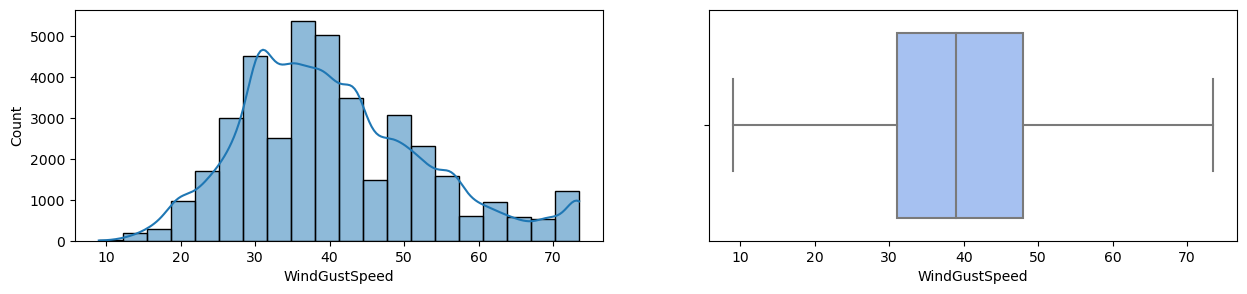

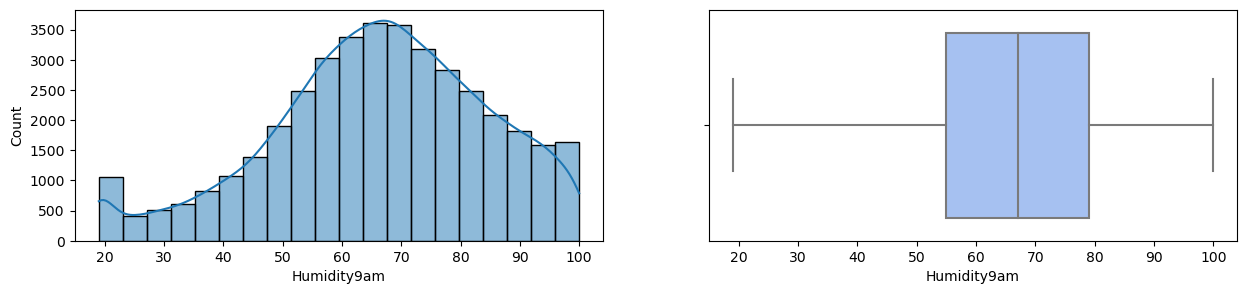

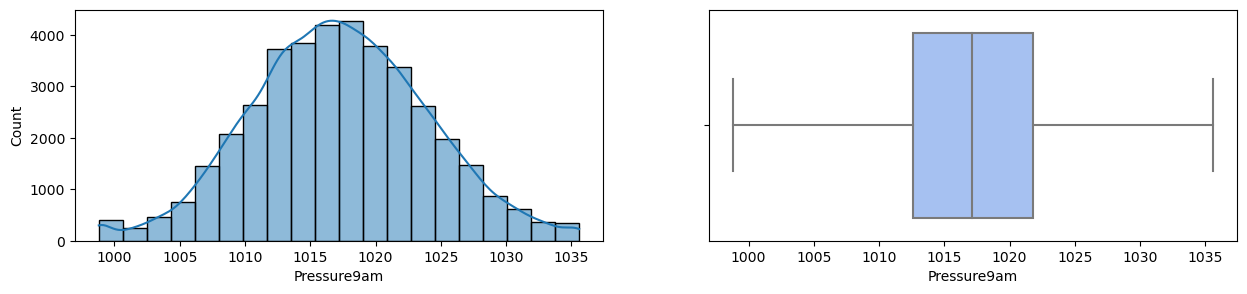

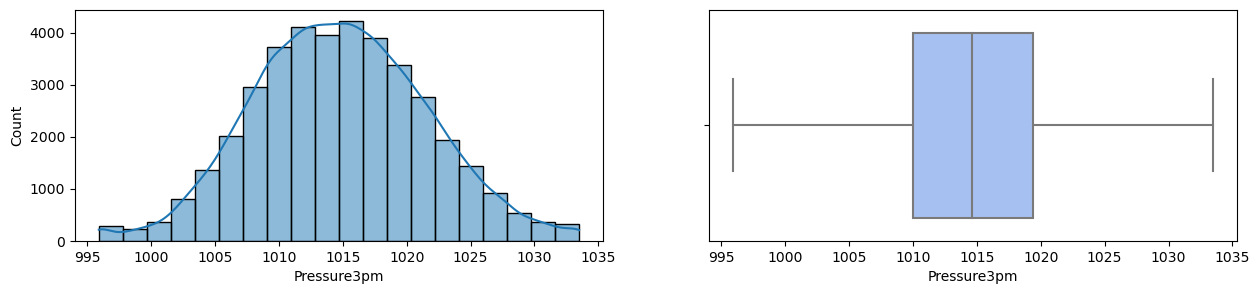

In [29]:
# Create functions to display the histogram and box plot.
num_col = ['WindGustSpeed', 'Humidity9am', 'Pressure9am', 'Pressure3pm']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(train[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(train[i], ax = axs[1], color='#99befd', fliersize=1);

### D5. Memisahkan Data Feature dan Target

In [30]:
X_train = train.drop(columns='RainTomorrow')
y_train = train['RainTomorrow']

X_test = test.drop(columns='RainTomorrow')
y_test = test['RainTomorrow']

### D6. Handling imbalance data

No     30854
Yes     8640
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

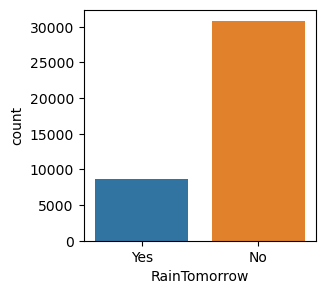

In [31]:
print(y_train.value_counts())

plt.figure(figsize=(3,3))
sns.countplot(x=y_train)

- The data train is not balanced; we will balance this data to improve the accuracy of learning the model. 

In [32]:
# handling data imbalance for train
smote = SMOTENC([0,9], sampling_strategy='minority')
X_train ,y_train = smote.fit_resample(X_train ,y_train)

print(X_train.shape ,y_train.shape)

(61708, 10) (61708,)


Smote is a method for dealing with data imbalance; in simple terms, the smallest data is increased after the largest data.This value will be increased by a number of values. SMOTENC is used because the data has categorical columns, i.e., in columns 0 and 9.

Yes    30854
No     30854
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

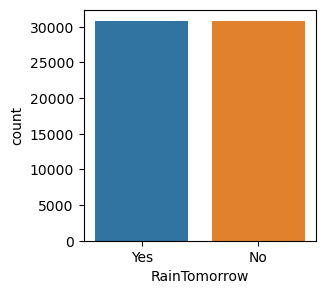

In [33]:
# Display a bar plot to see the results of the changes.
print(y_train.value_counts())

plt.figure(figsize=(3,3))
sns.countplot(x=y_train)

- X_train: The data has been balanced.
- No data balancing is performed on the X_test in order for the model to learn in real time from the test data because the target data is almost never balanced. 

### D7. Label Encoder Target

In [34]:
# encoding
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

### D8. Pipeline Scalling dan Encoding Feature

In [35]:
# Scaling feature numeric
num_pipe = Pipeline([('scaling', StandardScaler())])

# Encoding feature categorical
cat_pipe = Pipeline([('encode', OneHotEncoder(handle_unknown='ignore'))])

# pipeline process
preprocess = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

A column transformer is used because the process pipeline uses branching, so it cannot be used as a one-way regular pipeline.

# E. Modelling

In [36]:
# pipeline modeling
logreg_pipe = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('model', LogisticRegression())])
dectree = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('model', DecisionTreeClassifier())])
ranfor = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('model', RandomForestClassifier())])
knn = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('model', KNeighborsClassifier())])
naiveb = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('model', GaussianNB())])

In [37]:
# Process Model for Training 
%timeit logreg_pipe.fit(X_train, y_train)
%timeit dectree.fit(X_train, y_train)
%timeit ranfor.fit(X_train, y_train)
%timeit knn.fit(X_train, y_train)
%timeit naiveb.fit(X_train, y_train)

202 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.22 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.6 s ± 1.16 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
198 ms ± 5.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
139 ms ± 590 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# F. Model Evaluation

**1. LogisticRegression**

In [38]:
logreg_pipe.fit(X_train,y_train)
pipe_train_LR = logreg_pipe.predict(X_train)
pipe_test_LR = logreg_pipe.predict(X_test)

y_prob_train = logreg_pipe.predict_proba(X_train)[:,1]
y_prob_test = logreg_pipe.predict_proba(X_test)[:,1]

pipe_train_LR = classification_report(y_train, pipe_train_LR)
pipe_test_LR = classification_report(y_test, pipe_test_LR)
print('\t\t\tTrain Classification report:\n\n', pipe_train_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*41)
print('\t\t\tTest Classification report:\n\n', pipe_test_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_test))

			Train Classification report:

               precision    recall  f1-score   support

           0       0.79      0.79      0.79     30854
           1       0.79      0.79      0.79     30854

    accuracy                           0.79     61708
   macro avg       0.79      0.79      0.79     61708
weighted avg       0.79      0.79      0.79     61708
 

ROC-AUC Score Train: 0.8775887593839211
			Test Classification report:

               precision    recall  f1-score   support

           0       0.93      0.80      0.86     13139
           1       0.53      0.79      0.64      3787

    accuracy                           0.80     16926
   macro avg       0.73      0.80      0.75     16926
weighted avg       0.84      0.80      0.81     16926
 

ROC-AUC Score Train: 0.8810643877584181


**2. DecisionTreeClassifier**

In [39]:
dectree.fit(X_train,y_train)
pipe_train_LR = dectree.predict(X_train)
pipe_test_LR = dectree.predict(X_test)

y_prob_train = dectree.predict_proba(X_train)[:,1]
y_prob_test = dectree.predict_proba(X_test)[:,1]

pipe_train_LR = classification_report(y_train, pipe_train_LR)
pipe_test_LR = classification_report(y_test, pipe_test_LR)

print('\t\t\tTrain Classification report:\n\n', pipe_train_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*41)
print('\t\t\tTest Classification report:\n\n', pipe_test_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_test))

			Train Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30854
           1       1.00      1.00      1.00     30854

    accuracy                           1.00     61708
   macro avg       1.00      1.00      1.00     61708
weighted avg       1.00      1.00      1.00     61708
 

ROC-AUC Score Train: 1.0
			Test Classification report:

               precision    recall  f1-score   support

           0       0.88      0.78      0.83     13139
           1       0.46      0.64      0.54      3787

    accuracy                           0.75     16926
   macro avg       0.67      0.71      0.68     16926
weighted avg       0.79      0.75      0.76     16926
 

ROC-AUC Score Train: 0.7115352285438267


**3. RandomForestClassifier**

In [40]:
ranfor.fit(X_train,y_train)
pipe_train_LR = ranfor.predict(X_train)
pipe_test_LR = ranfor.predict(X_test)

y_prob_train = ranfor.predict_proba(X_train)[:,1]
y_prob_test = ranfor.predict_proba(X_test)[:,1]

pipe_train_LR = classification_report(y_train, pipe_train_LR)
pipe_test_LR = classification_report(y_test, pipe_test_LR)

print('\t\t\tTrain Classification report:\n\n', pipe_train_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*41)
print('\t\t\tTest Classification report:\n\n', pipe_test_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_test))

			Train Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30854
           1       1.00      1.00      1.00     30854

    accuracy                           1.00     61708
   macro avg       1.00      1.00      1.00     61708
weighted avg       1.00      1.00      1.00     61708
 

ROC-AUC Score Train: 1.0
			Test Classification report:

               precision    recall  f1-score   support

           0       0.91      0.85      0.88     13139
           1       0.58      0.72      0.64      3787

    accuracy                           0.82     16926
   macro avg       0.75      0.78      0.76     16926
weighted avg       0.84      0.82      0.83     16926
 

ROC-AUC Score Train: 0.8794622238347575


**4. KNeighborsClassifier**

In [41]:
knn.fit(X_train,y_train)
pipe_train_LR = knn.predict(X_train)
pipe_test_LR = knn.predict(X_test)

y_prob_train = knn.predict_proba(X_train)[:,1]
y_prob_test = knn.predict_proba(X_test)[:,1]

pipe_train_LR = classification_report(y_train, pipe_train_LR)
pipe_test_LR = classification_report(y_test, pipe_test_LR)

print('\t\t\tTrain Classification report:\n\n', pipe_train_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*41)
print('\t\t\tTest Classification report:\n\n', pipe_test_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_test))

			Train Classification report:

               precision    recall  f1-score   support

           0       0.94      0.84      0.89     30854
           1       0.85      0.95      0.90     30854

    accuracy                           0.89     61708
   macro avg       0.90      0.89      0.89     61708
weighted avg       0.90      0.89      0.89     61708
 

ROC-AUC Score Train: 0.9715384382199983
			Test Classification report:

               precision    recall  f1-score   support

           0       0.91      0.78      0.84     13139
           1       0.50      0.74      0.60      3787

    accuracy                           0.78     16926
   macro avg       0.71      0.76      0.72     16926
weighted avg       0.82      0.78      0.79     16926
 

ROC-AUC Score Train: 0.8333196837704098


**5. GaussianNB**

In [42]:
naiveb.fit(X_train,y_train)
pipe_train_LR = naiveb.predict(X_train)
pipe_test_LR = naiveb.predict(X_test)

y_prob_train = naiveb.predict_proba(X_train)[:,1]
y_prob_test = naiveb.predict_proba(X_test)[:,1]

pipe_train_LR = classification_report(y_train, pipe_train_LR)
pipe_test_LR = classification_report(y_test, pipe_test_LR)

print('\t\t\tTrain Classification report:\n\n', pipe_train_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*41)
print('\t\t\tTest Classification report:\n\n', pipe_test_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_test))

			Train Classification report:

               precision    recall  f1-score   support

           0       0.79      0.78      0.79     30854
           1       0.78      0.80      0.79     30854

    accuracy                           0.79     61708
   macro avg       0.79      0.79      0.79     61708
weighted avg       0.79      0.79      0.79     61708
 

ROC-AUC Score Train: 0.8741550730822085
			Test Classification report:

               precision    recall  f1-score   support

           0       0.93      0.79      0.85     13139
           1       0.52      0.79      0.62      3787

    accuracy                           0.79     16926
   macro avg       0.72      0.79      0.74     16926
weighted avg       0.84      0.79      0.80     16926
 

ROC-AUC Score Train: 0.872437971177469


model terbaik adalah Logistic Regression
- model just fit
- dibandingkan model lain yang rata2 memiliki kecenderungan untuk overfitting
- model ini dipilih karena konsistensinya dalam belajar

**Mendefinisikan Ulang X_train dan X_test**

In [44]:
placement_prepared = preprocess.fit_transform(X_train)
placement_test_prepared = preprocess.fit_transform(X_test)

# G. Hyperparameter Tunning Best Model

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.1, 1.0, 10.0]}
  ]

log = LogisticRegression()
grid_search = GridSearchCV(log, param_grid, cv=5,
                           scoring='precision',
                           return_train_score=True)

grid_search.fit(placement_prepared, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1.0, 10.0],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='precision')

In [46]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


GridSearch CV best score : 0.8011


Parameters that give the best results : 

 {'C': 10.0, 'solver': 'liblinear'}


**didapatkan hyperparameter terbaiknya adalah  {'C': 10.0, 'solver': 'liblinear'}**
- dan ini berhasil menaikan nilai score belajar model
- kita lihat perbaikan dan perubahan pada nilai dibawah ini :

In [47]:
grid_search.fit(placement_prepared,y_train)
pipe_train_LR = grid_search.predict(placement_prepared)
pipe_test_LR = grid_search.predict(placement_test_prepared)

y_prob_train = grid_search.predict_proba(placement_prepared)[:,1]
y_prob_test = grid_search.predict_proba(placement_test_prepared)[:,1]

pipe_train_LR = classification_report(y_train, pipe_train_LR)
pipe_test_LR = classification_report(y_test, pipe_test_LR)
print('\t\t\tTrain Classification report:\n\n', pipe_train_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("="*41)
print('\t\t\tTest Classification report:\n\n', pipe_test_LR, '\n')
print('ROC-AUC Score Train:',roc_auc_score(y_test, y_prob_test))

			Train Classification report:

               precision    recall  f1-score   support

           0       0.79      0.80      0.80     30854
           1       0.80      0.79      0.80     30854

    accuracy                           0.80     61708
   macro avg       0.80      0.80      0.80     61708
weighted avg       0.80      0.80      0.80     61708
 

ROC-AUC Score Train: 0.8843113016890558
			Test Classification report:

               precision    recall  f1-score   support

           0       0.96      0.67      0.79     13139
           1       0.44      0.90      0.59      3787

    accuracy                           0.73     16926
   macro avg       0.70      0.79      0.69     16926
weighted avg       0.84      0.73      0.75     16926
 

ROC-AUC Score Train: 0.8871302602208279


# Final Analysis

## Model Analysis

After preprocessing data, starting from handling outlier, skewness, encoding, scalling, balancing data
modeling, with 5 default models, the selected models are:
- Logistic Regression
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier
- GaussianNB
Of the entire model, the best models are logistic regression and GaussianNB. Both have almost equivalent roc-auc values, and at f1 values, the model score is more consistent with logistic regression.
- The F1 score is calculated using the values ROC-AUC, recall, and precision in the evaluation of this best model.
- Because the target data is imbalanced, the accuracy value is biased.
After obtaining the best model, hyperparameter tuning is carried out using GridSearch CV with the parameters as above. and obtained the best hyperparameters are:
- 'C' equals 10.0;'solver' equals 'lbfgs'
- The results improved on the ROC-AUC value 2, recall, and precision scores (F1) after the model was tested again in a train test, and the model remained consistent as well as justly fitted.
- and the model is ready for deployment.

### Translate
setelah dilakukan preprocessing data, mulai dari handling outlier, skewness, encoding, scalling, balancing data
dilakukan pemodelan, dengan 5 model default, model-model yang dipilih adalah :
- Logistic Regression
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier
- GaussianNB
dari keseluruhan model, model terbaik adakah Logistic Regression dan GaussianNB. keduanya memiliki nilai roc-auc yang hampir setara, kemudian pada nilai f1 score modelnya lebih konsisten Logistic Regression.
- pada penilain model terbaik ini, digunakan nilai roc-auc, recall, precision = f1 score.
- karena data targetnya imbalance jadi untuk nilai accuracy nya bias
setelah didapatkan model terbaik, dilakukan hyperparameter tunning menggunakan GridSearch CV dengan parameter seperti diatas. dan didapatkan hyperparameter terbaik adalah :
- {'C': 10.0, 'solver': 'lbfgs'}
- kemudian setelah model kembali dilakukan pengujian train test, hasilnya membaik pada nilai2 roc-auc, recall, precision = f1 score dan model tetap konsisten juga just fit.
- dan model siap untuk di deployment.

## Overall Analysis
pada data ini ditemukan sangat banyak nilai nan/missing value hanya 2 kolom yang tidak ada missing valuenya, bahkan pada satu kolom ada yang missing valuenya hampir 70% data. tetapi saat dicek beberapa nilai missing ini memiliki korelasi sehingga drop kolom bukan solusi, kemudian dilakukan drop row sehingga data bersih dari nilai nan, pertimbangan nya adalah untuk menjaga value data. meskipun kita mungkin kehilangan banyak row lain.

unik nya kolom date ternyata memiliki korelasi dan ditemukan ternyata itu menggambarkan musim tertentu,
didapatkan 10 kolom yang akan menjadi feature. kemudian dilakukan pengolahan data numeric, categorical, balancing data target dan permodelan.

disini setiap prosesnya mulai dari treatment pengolahan data hingga modelling menggunakn pipeline dan untuk proses yang paralel menggunakn transformer, yang membuat proses ini sangat singkat secara code.

secara keseluruhan model yang didapatkan sangat baik, untuk mempresiksi cuaca 1 hari yang akan datang. dengan konsistensi model yang sangat konsistent.

# Deployment
**The best models and estimators are saved for use on deployments. **

In [48]:
final_model = grid_search.best_estimator_

In [49]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocess),
        ("logistic", final_model)
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

Finally, the model is ready for use.

In [50]:
import pickle

In [51]:
pickle.dump(full_pipeline_with_predictor, open('model.pkl', 'wb'))